In [1]:
from sympy import * 
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 
from matplotlib import gridspec
import pylab
%matplotlib inline
init_printing() 

In [2]:
k, t, L, y0, yt = symbols('k t L y0 yt') 
y = Function('y')

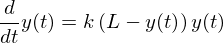

In [3]:
ode = Eq(y(t).diff(t), k*y(t)*(L-y(t)))   
ode 

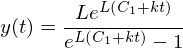

In [4]:
ode_sol = dsolve(ode) 
ode_sol 

In [5]:
ics = {y(0): y0}  
ics 

In [6]:
C1 = symbols("C1") 

Left hand of ODE becomes = y0  and the Right hand of ODE becomesy = L*exp(C1*L)/(exp(C1*L) - 1)


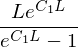

In [7]:
ilhs = ode_sol.lhs.subs(y(t), y0)
irhs = ode_sol.rhs.subs(t, 0)
print("Left hand of ODE becomes =", ilhs, " and the Right hand of ODE becomesy =" ,irhs)  
irhs
 

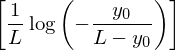

In [8]:
C1val = solve(Eq(ilhs, irhs), C1) 
C1val

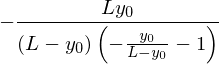

In [9]:
irhs.subs(C1, 1/L*log(-y0/(L-y0)))      

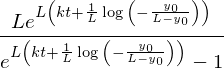

In [10]:
rhsf = (ode_sol.rhs.subs(C1, 1/L*log(-y0/(L-y0)))) 
rhsf 

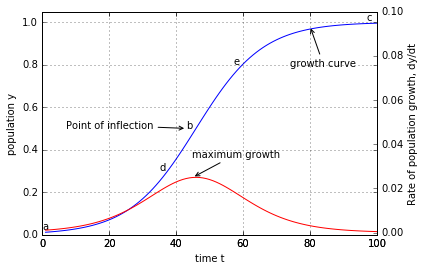

In [11]:
L = 1
y0 = 0.01
k = 0.1 
t = np.linspace(1, 100,100)
y = (L/(1+((L-y0)/y0)*np.exp(-k*t*L))) 
dydt = k*y*(L-y) 

fig1 = pylab.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(t,y, '-')
plt.ylim(-0.001, 1.05)
plt.ylabel("population y")  
plt.xlabel("time t")
plt.grid() 

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot(t, dydt,'r-')
plt.ylim(-0.001, 0.1) 
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.ylabel("Rate of population growth, dy/dt") 

#plt.legend([line1, line2], ['Line Up', 'Line Down'])   
ax1.annotate("d", xy = (35, 0.3))  
ax1.annotate("a", xy = (0, 0.025))  
ax1.annotate("b", xy = (43, 0.5)) 
ax1.annotate("e", xy = (57, 0.8)) 
ax1.annotate("c", xy = (97, 1.01))
ax1.annotate('Point of inflection', xy=(43, 0.5),
                xytext=(-120, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->") )  
        
ax2.annotate("maximum growth", xy = (45, 0.025), xytext=(-1, 20), textcoords='offset points', arrowprops=dict(arrowstyle="->") ) 
ax1.annotate("growth curve", xy =(80,0.98), xytext = (-20,-40), textcoords='offset points', arrowprops=dict(arrowstyle="->", ) ) 
plt.savefig("fig1", format = "pdf") 

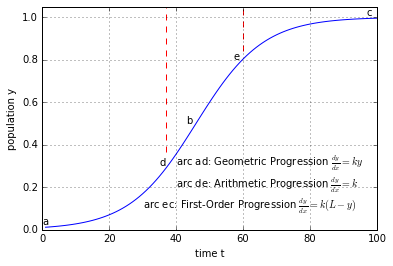

In [12]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(t,y, '-')
plt.ylim(-0.001, 1.05)
plt.ylabel("population y")  
plt.xlabel("time t")
plt.grid() 
 
ax1.annotate("d", xy = (35, 0.3))  
ax1.annotate("a", xy = (0, 0.025))  
ax1.annotate("b", xy = (43, 0.5)) 
ax1.annotate("e", xy = (57, 0.8)) 
ax1.annotate("c", xy = (97, 1.01))

ax1.axvline(37, ymin=0.35, ymax=1, linestyle='--', c = "red") 
ax1.axvline(60, ymin=0.8, ymax=1, linestyle='--', c = "red") 

ax1.text(30, 0.1, r'arc ec: First-Order Progression $\frac{dy}{dx} = k(L-y) $', rotation='horizontal') 
ax1.text(40, 0.2, r'arc de: Arithmetic Progression $\frac{dy}{dx} = k $', rotation='horizontal')
ax1.text(40, 0.3, r'arc ad: Geometric Progression $\frac{dy}{dx} = ky $', rotation='horizontal')  
  
# for legend
#lines = line1 + line2
#labs = [l.get_label() for l in lines] 
#ax.legend(lines, labs, loc=1)     
plt.savefig("fig2", format="pdf") 

# For the arc _ec_#
This part of the growth curve is represented by the _First-Order Progression_, which is: <br />
$\frac{dy}{dt} = k(L-y) $. <br />
The integrated form of the equation is <br />
$y = L - (L - y_0)\exp(-kt)$,<br /><br />

# For the arc _de_# 
This part of the growth curve is represented by the _Arithmetic Progression_, which is: <br />
$\frac{dy}{dt} = k $. <br />
The integrated form of the equation is <br />
$y = y_0 + kt$<br /><br />

# For the arc _ad_# 
This part of the growth curve is represented by the _Geometric Progression_, which is: <br />
$\frac{dy}{dt} = ky $. <br />
The integrated form of the equation is <br />
$y = y_0 \exp(-kt$)<br /><br />


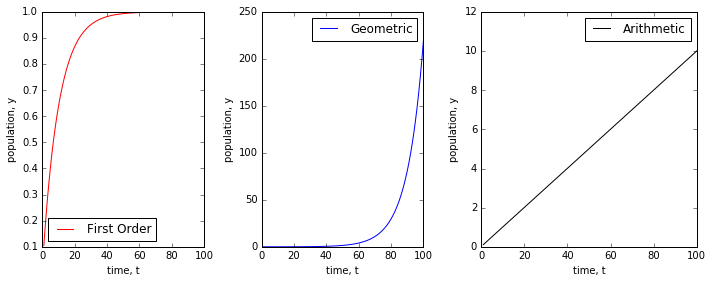

In [13]:
t = np.linspace(1, 100,100)
y1 = L - (L-y0)*np.exp(-k*t) # First Order Progression
y2 = y0*np.exp(k*t) # Geometric Progression
y3 =  y0 + k*t # Arithmetic Progression
fig1 = plt.figure(figsize= (10,4)) 

gs = gridspec.GridSpec(1, 3, width_ratios= [3,3,4]) 

ax0 = plt.subplot(gs[0])
ax0.plot(t, y1, "r-", label ="First Order") 
plt.xlabel("time, t")
plt.ylabel("population, y") 
plt.legend(loc = 0)  


ax1 = plt.subplot(gs[1])
ax1.plot(t, y2, 'b-', label = "Geometric") 
plt.xlabel("time, t")
plt.ylabel("population, y")
plt.legend(loc = 0)  

ax2 = plt.subplot(gs[2])
ax2.plot(t, y3, 'k-', label = 'Arithmetic') 
plt.xlabel("time, t")
plt.ylabel("population, y")
plt.legend(loc = 0)

plt.tight_layout()     